In [2]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

In [2]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = - 1.0*x2 + np.random.uniform(size=1000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1.head()

,x0,x1,x2,x3,x4,x5
0,1.927230,13.954044,3.746025,0.550783,-3.088811,8.595694
1,0.519547,4.433250,1.061387,0.094886,-0.395029,2.454158
2,3.698056,24.108677,6.249745,0.941416,-5.269196,15.021128
3,2.593805,19.135202,5.674335,0.798871,-5.133652,10.829979
4,1.632931,12.917426,3.891940,0.512411,-3.006800,7.379958


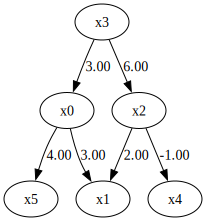

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [4]:
x3 = np.random.uniform(size=1000)
x0 = 3.5*x3 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = 8.5*x0 - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2.head()

,x0,x1,x2,x3,x4,x5
0,1.727768,13.239591,2.876343,0.411133,11.246763,7.795642
1,1.669489,15.617663,3.813231,0.464050,9.226033,8.155265
2,4.053081,32.228950,7.034818,0.974529,24.486618,18.320158
3,3.188053,25.218736,5.362938,0.789529,20.009237,14.911513
4,1.458181,11.026574,2.305683,0.302755,9.843089,6.859074


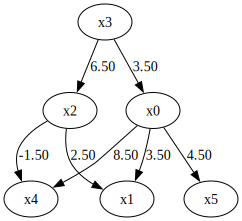

In [5]:
m = np.array([[0.0, 0.0, 0.0, 3.5, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.5, 0.0,-1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [6]:
X_list = [X1, X2]

In [7]:
model = lingam.MultiGroupDirectLiNGAM()
model.fit(X_list)

In [8]:
model.causal_order_

[3, 2, 0, 1, 4, 5]

[[ 0.          0.          0.          2.97302554  0.          0.        ]
 [ 3.04223452  0.          1.97993066  0.          0.          0.        ]
 [ 0.          0.          0.          6.01341971  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.99728187  0.          0.          0.        ]
 [ 3.99719825  0.          0.          0.          0.          0.        ]]


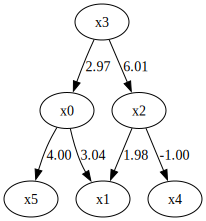

In [9]:
print(model.adjacency_matrices_[0])
make_dot(model.adjacency_matrices_[0])

[[ 0.          0.          0.          3.52050585  0.          0.        ]
 [ 3.51112182  0.          2.48962826  0.          0.          0.        ]
 [ 0.          0.          0.          6.4452031   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 8.48646029  0.         -1.49478267  0.          0.          0.        ]
 [ 4.49103423  0.          0.          0.          0.          0.        ]]


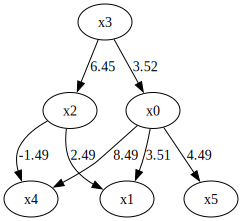

In [10]:
print(model.adjacency_matrices_[1])
make_dot(model.adjacency_matrices_[1])

## RQ1: Compositionality influences the Estimation of the Network?
Compositionality along with other issues is one of the main curse of microbiome data. If we were to force compositionality among variables, how the estimation would be affected?

In [73]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = - 1.0*x2 + np.random.uniform(size=1000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
#normalizing by columns
X1=X1.div(X1.sum(axis=0), axis=1)
X1.head()

,x0,x1,x2,x3,x4,x5
0,0.001299,0.001394,0.001449,0.001572,0.001422,0.001242
1,0.001012,0.000982,0.000993,0.001044,0.001064,0.000971
2,0.000348,0.000443,0.000432,0.000367,0.000495,0.000337
3,0.001502,0.001513,0.001585,0.001726,0.001804,0.001449
4,0.001147,0.001137,0.001092,0.001072,0.001054,0.001119


In [74]:
x3 = np.random.uniform(size=1000)
x0 = 3.5*x3 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = 8.5*x0 - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
#normalizing by columns
X2=X2.div(X2.sum(axis=0), axis=1)

X2.head()

,x0,x1,x2,x3,x4,x5
0,0.000563,0.000575,0.000519,0.000319,0.000574,0.000570
1,0.000603,0.000525,0.000461,0.000473,0.000682,0.000594
2,0.001145,0.001065,0.001016,0.000962,0.001203,0.001135
3,0.001237,0.001226,0.001261,0.001269,0.001242,0.001186
4,0.001195,0.001188,0.001226,0.001340,0.001165,0.001161


1.0

In [75]:
X_list = [X1, X2]

In [76]:
model = lingam.MultiGroupDirectLiNGAM()
model.fit(X_list)

In [77]:
model.causal_order_

[3, 0, 2, 1, 5, 4]

[[0.         0.         0.         0.73963066 0.         0.        ]
 [0.44548732 0.         0.51583763 0.         0.         0.        ]
 [0.         0.         0.         0.84855241 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.1669377  0.         0.         0.        ]
 [0.9389142  0.         0.         0.         0.         0.        ]]


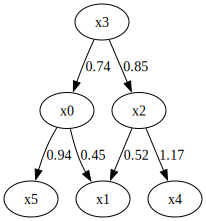

In [78]:
print(model.adjacency_matrices_[0])
make_dot(model.adjacency_matrices_[0])

[[ 0.          0.          0.          0.77724019  0.          0.        ]
 [ 0.4419165   0.          0.53025955  0.          0.          0.        ]
 [ 0.          0.          0.          0.86801876  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 1.37285199  0.         -0.4099142   0.          0.          0.        ]
 [ 0.95144049  0.          0.          0.          0.          0.        ]]


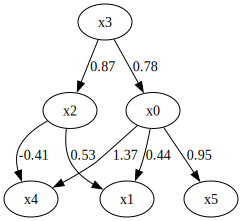

In [79]:
print(model.adjacency_matrices_[1])
make_dot(model.adjacency_matrices_[1])

In [90]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
#x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 =  3.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X=X.div(X.sum(axis=0), axis=1)

X.head()

,x0,x1,x2,x3,x4,x5
0,0.000780,0.001263,0.001780,0.000385,0.001736,0.000831
1,0.000727,0.000922,0.001083,0.000638,0.001052,0.000719
2,0.001090,0.001347,0.001594,0.001085,0.001608,0.001051
3,0.000808,0.000783,0.000678,0.000735,0.000709,0.000768
4,0.000532,0.000442,0.000339,0.000690,0.000345,0.000610


In [91]:
model = lingam.DirectLiNGAM()
model.fit(X)


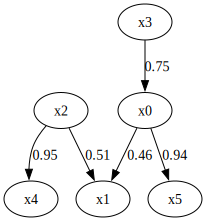

In [92]:
make_dot(model.adjacency_matrix_)

## Normalization using Z-score

In [95]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 =  3.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

X_normalized = (X - X.mean()) / X.std()


In [96]:
model = lingam.DirectLiNGAM()
model.fit(X_normalized)

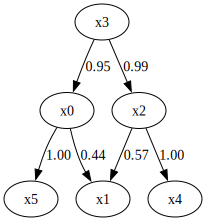

In [97]:
make_dot(model.adjacency_matrix_)

## Get the coefficient back

In [6]:
x0 = np.random.uniform(size=1000)
x1 = 3.0*x0 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1]).T ,columns=['x0', 'x1'])
X_normalized=X.div(X.sum(axis=0), axis=1)

X_normalized.head()

,x0,x1
0,0.000658,0.000831
1,0.000615,0.000862
2,0.000502,0.000510
3,0.001926,0.001740
4,0.000578,0.000569


In [7]:
X_normalized['x1'].sum()

1.0

In [8]:
K0=X['x0'].sum()
K1=X['x1'].sum()

In [15]:
model = lingam.DirectLiNGAM()
model.fit(X_normalized)

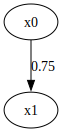

In [16]:
make_dot(model.adjacency_matrix_)

In [11]:
K1/K0

4.004422243419113

In [12]:
0.76*(K1/K0)

3.043360904998526

## Get the Coefficients Back (Chains, Forks, Colliders)
### Chain

Graph:

X0 -> X1 -> X2

Let $x_0 \sim \mathcal{U}(0, 1)$, then define:

$$
x_1 = 3.0 \cdot x_0 + \epsilon_1, \quad \epsilon_1 \sim \mathcal{U}(0, 1)
$$

$$
x_2 = 2.5 \cdot x_1 + \epsilon_2, \quad \epsilon_2 \sim \mathcal{U}(0, 1)
$$

The dataset $X \in \mathbb{R}^{1000 \times 3}$ is then:

$$
X = \begin{bmatrix}
x_0 & x_1 & x_2
\end{bmatrix}
$$

In [138]:
x0 = np.random.uniform(size=1000)
x1 = 3.0*x0 + np.random.uniform(size=1000)
x2 = -2.5*x1 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2]).T ,columns=['x0', 'x1', 'x2'])
X_normalized=X.div(X.sum(axis=0), axis=1)

X_normalized.head()

,x0,x1,x2
0,0.001880,0.001810,0.001977
1,0.001309,0.001130,0.001085
2,0.001129,0.001331,0.001286
3,0.001822,0.001732,0.001788
4,0.001001,0.000980,0.001033


In [139]:
model = lingam.DirectLiNGAM()
model.fit(X_normalized)

In [140]:
model.adjacency_matrix_

array([[0.        , 0.        , 0.        ],
       [0.75501504, 0.        , 0.        ],
       [0.        , 1.11074783, 0.        ]])

If $\tilde{x}_0 = \frac{x_0}{\sum x_0}$ and $\tilde{x}_1 = \frac{x_1}{\sum x_1}$, then:

$$
\tilde{x}_1 = \left( a \cdot \frac{\sum x_0}{\sum x_1} \right) \cdot \tilde{x}_0 + \frac{\epsilon_1}{\sum x_1}
$$

So the apparent coefficient becomes:

$$
\tilde{a} = a \cdot \frac{\sum x_0}{\sum x_1}
$$

And to recover the original coefficient $a$ from normalized variables:

$$
a = \tilde{a} \cdot \frac{\sum x_1}{\sum x_0}
$$


In [141]:
0.75315359*(X['x1'].sum()/X['x0'].sum()) #retrieving the first coefficient

3.0235536806075927

In [142]:
1.11074783*(X['x2'].sum()/X['x1'].sum())

-2.5064597607739385

### Collider

Graph:

X0->X1<-X2

In [154]:
import numpy as np
import pandas as pd

def compute_rescaling_matrix(adj_matrix: np.ndarray, X: pd.DataFrame) -> np.ndarray:
    """
    Compute the rescaling matrix R such that:
    B = R * B_tilde

    Parameters:
    - adj_matrix: np.ndarray, shape (n, n)
        Adjacency matrix (non-zero entries represent edges i → j)
    - X: pd.DataFrame, shape (n_samples, n_variables)
        Original (non-normalized) data

    Returns:
    - R: np.ndarray, shape (n, n)
        Rescaling matrix
    """
    sums = X.sum().values
    n = adj_matrix.shape[0]
    R = np.zeros((n, n))
    for i in range(n):         # row: target node
        for j in range(n):     # col: source node
            if adj_matrix[i, j] != 0:
                R[i, j] = sums[i] / sums[j]
    return R

In [152]:
x0 = np.random.uniform(size=1000)
x2 = np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.5*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2]).T ,columns=['x0', 'x1', 'x2'])
X_normalized=X.div(X.sum(axis=0), axis=1)

X_normalized.head()

,x0,x1,x2
0,0.000405,0.000333,0.000098
1,0.000217,0.000741,0.001439
2,0.000310,0.000449,0.000526
3,0.000757,0.000566,0.000124
4,0.000266,0.001007,0.001631


In [155]:
model = lingam.DirectLiNGAM()
model.fit(X_normalized)

In [156]:
model.adjacency_matrix_

array([[0.        , 0.        , 0.        ],
       [0.46287655, 0.        , 0.39914646],
       [0.        , 0.        , 0.        ]])

In [160]:
R=compute_rescaling_matrix(model.adjacency_matrix_, X)

In [ ]:
#element wise product
model.adjacency_matrix_*R

array([[0.        , 0.        , 0.        ],
       [3.05044518, 0.        , 2.55345223],
       [0.        , 0.        , 0.        ]])

### Fork

Graph:

X1<-X0->X2

In [174]:
x0 = np.random.uniform(size=1000)
x2 = 1.5*x0 + np.random.uniform(size=1000)
x1 = 2.0*x0 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2]).T ,columns=['x0', 'x1', 'x2'])
X_normalized=X.div(X.sum(axis=0), axis=1)

X_normalized.head()

,x0,x1,x2
0,0.000850,0.001164,0.000511
1,0.000509,0.000342,0.000388
2,0.001718,0.001675,0.001035
3,0.000060,0.000369,0.000612
4,0.001068,0.001180,0.001136


In [175]:
model = lingam.DirectLiNGAM()
model.fit(X_normalized)

In [176]:
R=compute_rescaling_matrix(model.adjacency_matrix_, X)

In [177]:
model.adjacency_matrix_*R

array([[0.        , 0.        , 0.        ],
       [2.01565432, 0.        , 0.        ],
       [1.50203159, 0.        , 0.        ]])

### using Z-score

In [166]:
def compute_rescaling_matrix_std(adj_matrix: np.ndarray, X: pd.DataFrame) -> np.ndarray:
    """
    Compute the rescaling matrix R such that:
    B = R * B_tilde

    Parameters:
    - adj_matrix: np.ndarray, shape (n, n)
        Adjacency matrix (non-zero entries represent edges i → j)
    - X: pd.DataFrame, shape (n_samples, n_variables)
        Original (non-normalized) data

    Returns:
    - R: np.ndarray, shape (n, n)
        Rescaling matrix
    """
    sdts = X.std().values
    n = adj_matrix.shape[0]
    R = np.zeros((n, n))
    for i in range(n):         # row: target node
        for j in range(n):     # col: source node
            if adj_matrix[i, j] != 0:
                R[i, j] = sdts[i] / sdts[j]
    return R

In [170]:
x0 = np.random.uniform(size=10_000)
x2 = np.random.uniform(size=10_000)
x1 = 3.0*x0 + 2.5*x2 + np.random.uniform(size=10_000)
X = pd.DataFrame(np.array([x0, x1, x2]).T ,columns=['x0', 'x1', 'x2'])

X_normalized = (X - X.mean()) / X.std()

In [171]:
model = lingam.DirectLiNGAM()
model.fit(X_normalized)

In [172]:
R=compute_rescaling_matrix_std(model.adjacency_matrix_, X)

In [173]:
model.adjacency_matrix_*R

array([[0.        , 0.        , 0.        ],
       [3.00175747, 0.        , 2.49963983],
       [0.        , 0.        , 0.        ]])

## Applying CLR transformation to the data

In [20]:

def clr_transform(df, pseudocount=1e-6):
    """
    Applies CLR (Centered Log-Ratio) transformation to a pandas DataFrame.
    
    Parameters:
    - df: pandas DataFrame with strictly positive values (e.g. relative abundances).
    - pseudocount: small value added to avoid log(0) (default = 1e-6).

    Returns:
    - DataFrame with CLR-transformed values.
    """
    df_pseudo = df + pseudocount
    log_df = np.log(df_pseudo)
    geometric_mean = log_df.mean(axis=1)
    clr_df = log_df.subtract(geometric_mean, axis=0)
    return clr_df

In [44]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 2.0*x2 + np.random.uniform(size=1000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1=X1.div(X1.sum(axis=1),axis=0)

In [45]:
x3 = np.random.uniform(size=1000)
x0 = 3.5*x3 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = 8.5*x0 + 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2=X2.div(X2.sum(axis=1), axis=0)

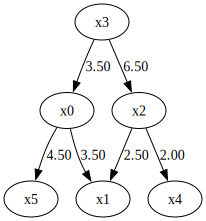

In [46]:
#first dag
m = np.array([[0.0, 0.0, 0.0, 3.5, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

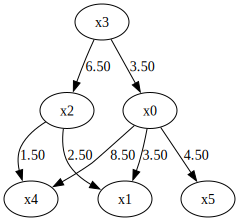

In [47]:
#second dag
m = np.array([[0.0, 0.0, 0.0, 3.5, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.5, 0.0, 1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [48]:
X1_clr=clr_transform(X1.copy())
X1_clr.head()

,x0,x1,x2,x3,x4,x5
0,-0.821044,1.335735,0.068625,-2.099150,0.864195,0.651639
1,-0.561898,1.362951,-0.025507,-2.376049,0.735449,0.865054
2,-0.683085,1.245656,-0.098459,-1.896618,0.699215,0.733291
3,-0.106420,1.621397,0.011600,-3.683012,0.779258,1.377177
4,-0.528818,1.336167,-0.198002,-2.278935,0.734249,0.935339


In [49]:
X2_clr=clr_transform(X2.copy())
X2_clr.head()

,x0,x1,x2,x3,x4,x5
0,-0.827190,1.206126,-0.367954,-2.313353,1.576405,0.725967
1,-0.747465,1.222243,-0.464880,-2.442274,1.617511,0.814864
2,-0.859734,1.238390,-0.317663,-2.339764,1.552938,0.725833
3,-0.763824,1.188515,-0.427514,-2.347134,1.601920,0.748037
4,-0.838758,1.200846,-0.349032,-2.256698,1.560650,0.682992


In [50]:
X_list = [X1_clr, X2_clr]
model = lingam.MultiGroupDirectLiNGAM()
model.fit(X_list)

[[ 0.         -1.         -1.         -1.         -1.         -1.        ]
 [ 0.          0.          0.         -0.24784166  0.          0.        ]
 [ 0.         -0.59353216  0.         -0.58193543 -0.12757676 -1.20607301]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.57641158  0.         -0.63932     0.         -0.9055316 ]
 [ 0.         -0.58004378  0.         -0.59310534  0.          0.        ]]


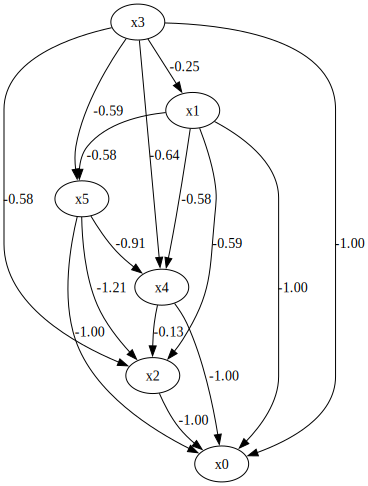

In [51]:
print(model.adjacency_matrices_[0])
make_dot(model.adjacency_matrices_[0])

[[ 0.         -1.         -1.         -1.         -1.         -1.        ]
 [ 0.          0.          0.         -0.1809544   0.          0.        ]
 [ 0.          0.          0.         -0.85676703 -1.86266362 -1.22823052]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.23195351  0.         -0.2408984   0.          0.17385273]
 [ 0.         -1.23131247  0.         -0.59530023  0.          0.        ]]


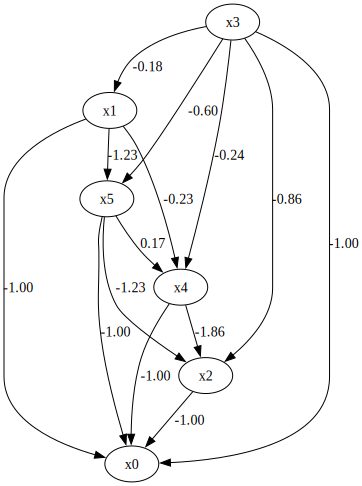

In [52]:
print(model.adjacency_matrices_[1])
make_dot(model.adjacency_matrices_[1])